<span style="color:blue"><font size="6">**Анализ оттока клиентов банка**</span>

    
**Презентация:**
https://disk.yandex.ru/i/BexD8FY-LoatVw

    
## Описание проекта
Предоставлены данные о клиентах регионального банка "Метанпром". Банк располагается в Ярославле, Ростове Великом и Рыбинске. Предстоит изучить портреты клиентов банка и составить рекомендации для отдела маркетинга по удержанию клиентов. 
    
<span style="color:red">**Цель исследования:**</span> 
    
Определить сегмент клиентов наиболее склонных к оттоку.
    
    
    
    
<span style="color:red">**Задачи:**</span> 
* провести исследовательский анализ данных (определить признаки отточности клиентов)
* выделить сегменты высокооточных клиентов
* сформулировать и проверить статистические гипотезы
* разработать рекомендации по удержанию клиентов
    
    
**Описание данных:**
    
- USERID — идентификатор пользователя,  
- score — баллы кредитного скоринга, 
- city — город,
- gender — пол,
- age — возраст,
- equity — количество ,баллов собственности,
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — активный клиент,
- EST_SALARY — щценочный доход клиента,
- churn — признак оттока.

## Загрузка и ознакомление с данными

In [47]:
# импортируем необходимые бибилиотеки
import pandas as pd     
import numpy as np                            
import scipy.stats as st

import seaborn as sns                          
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

In [48]:
# создадим функцию для отображения общей информации о таблице, пропусках и явных дубликатах
def df_info(df):
    pd.set_option("max_colwidth", 100)
    display(df.head())
    print(' ')
    df.info()
    print(' ')
    print('\033[1m' + 'Пропуски в таблице:' + '\033[0m')
    display(df.isna().sum())
    print('\033[1m' + 'Количество дубликатов в таблице:' + '\033[0m', df.duplicated().sum())

In [49]:
try:
    banks = pd.read_csv('/datasets/bank_scrooge.csv')
except:
    banks = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
df_info(banks)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
 
Пропуски в таблице:


USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

Количество дубликатов в таблице: 0


**В таблице представлены 10 000 записей о клиентах банка. Столбцы 'score' и 'age'  необходимо привести к целочисленному типу данных. Наименования столбцов необходимо привести к нижнему регистру. Пропущенные значения наблюдаются в 2 столбцах. Полные дубликаты не найдены.**

## Предобработка данных

### Наименования столбцов

In [50]:
# приведем наименования столбцов к единому стилю
banks.columns = banks.columns.str.lower()
banks.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

### Неявные дубликаты строк

In [51]:
# теперь посмотрим на неявные дубликаты(есть ли одинаковый id в одном городе)
banks[banks.duplicated(subset=['userid', 'city'], keep=False)].sort_values(by='userid')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


Дупликатов по id в одном городе не обнаружено. Посмотрим есть ли дупликаты по id, полу и возрасту:

In [52]:
banks[banks.duplicated(subset=['userid', 'gender', 'age'], keep=False)].sort_values(by='userid')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3274,155765,863.0,Ярославль,М,30.0,5,1036114.50,5,1,1,150744.50,1
5197,155765,923.0,Рыбинск,М,30.0,0,NaN,1,1,1,120296.60,0
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1
8497,227795,839.0,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0


**Обнаружены 2 одинаковых id:  мужчина 30 лет и мужчина 34 лет. Однако по многим признакам данные разнятся, нет возможности предположить какая строка является корректной. Возможно действительно в 2-х городах есть одинаковые id и по случайности совпадает и пол, и возраст, а возможно произошел технический сбой при сборе данных. Так как это всего 2 id, оставим их как есть.**

### Уникальные значения

In [53]:
# проверим наименования городов
banks['city'].value_counts()

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

In [54]:
# проверим пол
banks['gender'].value_counts()

М    5005
Ж    4995
Name: gender, dtype: int64

**С уникальными значениями все в порядке, нет ошибочных записей.**

### Пропущенные значения

In [55]:
# посмотрим на пропуски в %-ом соотношении
for col in banks.columns:
    print(col,' - ', round(banks[col].isna().mean()*100,2),'%')

userid  -  0.0 %
score  -  0.0 %
city  -  0.0 %
gender  -  0.0 %
age  -  0.26 %
equity  -  0.0 %
balance  -  22.95 %
products  -  0.0 %
credit_card  -  0.0 %
last_activity  -  0.0 %
est_salary  -  0.0 %
churn  -  0.0 %


In [56]:
# посмотрим записи с пропуском возраста
banks[banks['age'].isna()]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


Таак как в столбце с возрастом пропусков менее 1 %,а также в большинстве записей есть пропуски в столбце и с балансом, целесообразно будет их удалить.

In [57]:
banks = banks.dropna(subset = ['age']).reset_index(drop=True)

In [58]:
# теперь посмотрим записи с пропуском данных о балансе на счете
banks[banks['balance'].isna()].head(10)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0
21,177415,896.0,Рыбинск,Ж,47.0,0,NaN,1,0,0,225060.35,0
30,155730,946.0,Ярославль,Ж,47.0,0,NaN,2,1,1,660015.85,0
34,205226,944.0,Ярославль,М,35.0,0,NaN,2,1,1,239843.39,0
39,173175,924.0,Рыбинск,Ж,51.0,0,NaN,1,1,1,248844.47,0
43,228585,956.0,Ростов,М,41.0,0,NaN,1,1,0,115117.10,0


**Природа возникновения пропусков в столбце с балансом до конца не ясна: возможно технический сбой при сборе данных, возможно  данные клиенты не имели средств на счету в банке в момент сбора данных. Также нет возможности опереться на остальные данные, чтобы восстановить пропуски. Так как % пропусков ~23%, удалять их нельзя - остается только оставить их в неизменном виде.**

### Типы данных

Столбцы 'score' и 'age'  приведем к целочисленному типу данных.

In [59]:
banks[['score','age']] = banks[['score', 'age']].astype(int)

### Аномальные значения

In [60]:
# посмотрим на описание численных данных в целом
banks.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9974.000000,9974.000000,9974.000000,9974.000000,7.695000e+03,9974.000000,9974.000000,9974.000000,9.974000e+03,9974.000000
mean,171755.218669,848.682575,42.734409,2.630840,8.272456e+05,1.871466,0.680168,0.522859,1.477868e+05,0.182374
std,33695.527126,65.399720,12.179971,1.979965,1.980327e+06,0.792729,0.466435,0.499502,1.392855e+05,0.386172
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142760.000000,802.000000,33.000000,0.000000,2.956987e+05,1.000000,0.000000,0.000000,7.525166e+04,0.000000
50%,172643.000000,853.000000,40.000000,3.000000,5.242953e+05,2.000000,1.000000,1.000000,1.196268e+05,0.000000
75%,201163.750000,900.000000,51.000000,4.000000,9.800512e+05,2.000000,1.000000,1.000000,1.744998e+05,0.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


**На первый взгляд никаких выбивающихся значений нет:**
* данные скорингового балла находятся в рамках принятого рейтинга
* возраст клиентов от 18 до 86 (клиенты могут получать стипендию или пенсию на карту)
* балл собственности также в рамках рейтинга
* данные по балансу и общему доходу на выбросы детальнее разберем в исследовательском анализе

In [61]:
# посмотрим на информацию о данных после обработки
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9974 entries, 0 to 9973
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9974 non-null   int64  
 1   score          9974 non-null   int32  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int32  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(2), int32(2), int64(6), object(2)
memory usage: 857.3+ KB


**В ходе предобработки данных:**
* наименования столбцов были приведены к нижнему регистру, 
* данные были проверены на неявные дубликаты,
* были удалены проопуски в столбце с возрастом клиентов (из 10 000 записей осталось 9 974),
* пропуски в стобце с балансом на счете оставили так как есть, чтобы не искажать конечный результат анализа,
* столбцы с возрастом и скоринговым баллом были приведены к типу int.

## Исследовательский анализ данных(EDA)

In [62]:
# создадим функцию,с помощью которой рассмотрим долю клиентов по каждому признаку(дискретному) и от признака оттока
def attribute_d(column,name):
    groups = banks.groupby(column).agg({'userid': 'count'})
    
    fig = go.Figure()
    fig.add_trace(go.Pie(values=groups['userid'], labels=groups.index))
    fig.update_layout(
        title=f'Распределение клиентов банка по {name}',
        title_x = 0.5,
        width=800,
        height=500)
    fig.show() 
    
    groups_churn = banks.groupby([column, 'churn'])['userid'].count()
    groups_churn = groups_churn.reset_index().sort_values(by='userid', ascending=False)
    
    fig = px.bar(groups_churn, x= column, y='userid', color='churn', text='userid')
    fig.update_layout(
        title=f'Распределение клиентов в зависимости от признака оттока по {name}',
        title_x = 0.5,
        xaxis_title='Признак',
        yaxis_title='Число клиентов',
        width=800,
        height=500)
    fig.update_layout(coloraxis_showscale=False)
    fig.show()  

In [63]:
# для непрерывных признаков создадим другую функцию
def attribute_c(column,name, col):
    plt.figure(figsize=(15,5))
    sns.histplot(data=banks,
                   hue='churn',
                   x=column, 
                   stat="density", 
                   common_norm=False, 
                   bins=col, 
                   alpha=0.4)
    plt.title(f'Распределение клиентов в зависимости от признака оттока по {name}')
    plt.legend(labels=['Действующие клиенты', 'Отточные клиенты'])
    plt.xlabel('Показатель признака')
    plt.ylabel('Частота')
    plt.grid()
    plt.show() 

### Общий процент оттока клиентов по банку

Прежде чем изучать отток клиентов в зависимости от каждого признака в отдельности, рассчитаем средний % оттока по банку:

In [64]:
print('Процент оттока клиентов по банку:', round(banks['churn'].mean()*100,1))

Процент оттока клиентов по банку: 18.2


### Распределение клиентов по городам

In [65]:
attribute_d('city', 'городам')

**Большинство клиентов банка это жители Ярославля (59%), при этом отточных клиентов 19 %. Жители Рыбинска занимают 27% от общего числа клиентов, при этом из них уходят из банкка 16%. Клиентов из Ростова 14%, % оттока - 18,7%.**

### Распределение клиентов по половому признаку



In [66]:
attribute_d('gender', 'половому признаку')

**Не смотря на равное соотношение мужчин и женщин как клиентов банка, мужчины более склонны уходить.**

### Распределение клиентов по наличию кредитной карты

In [67]:
attribute_d('credit_card', 'наличию кредитной карты')

**68% клиентов используют кредитную карту банка, лишь 14,7% от этого числа клиентов склонны к уходу из банка. Процент оттока клиентов без кредитной карты выше - 25,6%** 

### Распределение клиентов по активности

In [68]:
attribute_d('last_activity', 'активности')

**Больше половины клиентов банка проявляли активные действия по обслуживанию на момент сбора данных, однако, 24,5 % этих клиентов все же прекратили свое обслуживание. При этом из клиентов,которые не являлись активными, ушло всего лишь 11%**

### Распределение клиентов по баллам собственности

In [69]:
attribute_d('equity', 'баллам собственности')

**Почти 26% всех клиентов банка получили оценку 0 в зависимости от наличия собственности, при этом клиенты с таким баллом практически не уходят из банка. Клиенты с оценкой 1-2 также не склонны к оттоку. 37,7% клиентов имеют средний балл - 4-5 и при этом в этой категории самый высокий % оттока - 27,6%. Меньше всего клиентов с наивысшим баллом 8-9.**

### Распределение клиентов по количеству продуктов банка

In [70]:
attribute_d('products', 'продуктам банка')

**Больше половины всех клиентов используют не менее 2 продуктов банка, процент оттока данных клиентов составляет 19%. Клиенты с 1 продуктом уходят крайне редко, всего 7%. И напротив, клиенты с 4 продуктами стремительно прекращают свое взаимодействие с банком - 63% оттока.**

### Распределение клиентов по скоринговому баллу

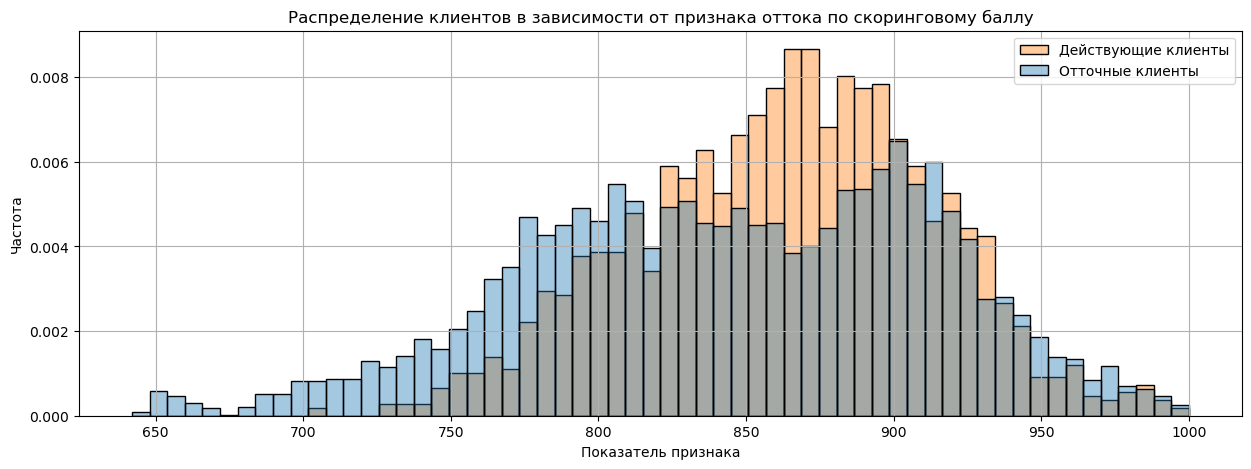

In [71]:
attribute_c('score', 'скоринговому баллу',60)

**В датасете представлены клиенты с баллами выше 642, максимальный балл - 1000. Основная масса клиентов имеет балл от 840 до 920. Клиенты склонные к оттоку чаще имеют балл ниже 800, при этом наибольший отток у клиентов с баллом 900 - 920.**

In [72]:
s= banks.query('churn == 1')
print(round(s['score'].mean(),1))
s.describe()

863.4


,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,1819.000000,1819.000000,1819.000000,1819.000000,1.806000e+03,1819.000000,1819.000000,1819.000000,1.819000e+03,1819.0
mean,170980.103903,863.416163,41.450247,3.763057,1.134458e+06,2.376031,0.551402,0.702034,1.482897e+05,1.0
std,35291.182757,49.620984,11.176459,1.585980,2.034446e+06,0.923592,0.497488,0.457490,1.229322e+05,0.0
min,94561.000000,706.000000,18.000000,0.000000,6.000000e+00,0.000000,0.000000,0.000000,1.088027e+04,1.0
25%,141304.000000,828.000000,32.000000,3.000000,3.874822e+05,2.000000,0.000000,0.000000,8.319661e+04,1.0
50%,170532.000000,866.000000,39.000000,4.000000,7.839089e+05,2.000000,1.000000,1.000000,1.253952e+05,1.0
75%,201399.500000,898.000000,52.000000,5.000000,1.348128e+06,3.000000,1.000000,1.000000,1.759854e+05,1.0
max,229058.000000,1000.000000,79.000000,9.000000,6.486621e+07,5.000000,1.000000,1.000000,1.263028e+06,1.0


### Распределение клиентов по возрасту

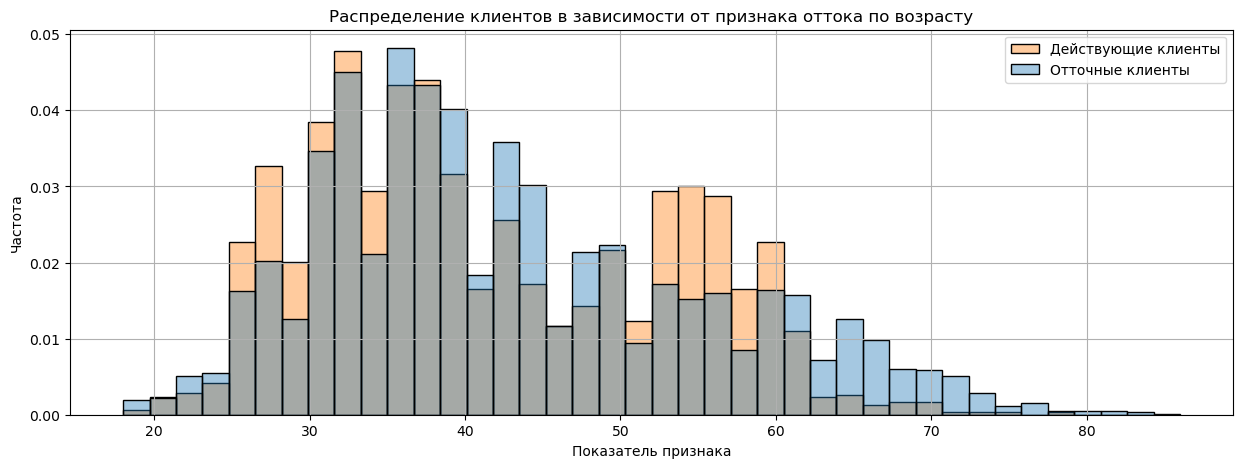

In [73]:
attribute_c('age', 'возрасту',40)

**Минимальный возраст клиентов банка 18 лет,  максимальный - 86 лет. Больше всего клиентов в возрасте 32-42, средний показатель -  39 лет. Если рассматривать отточных клиентов, то это скорее люди в возрасте 35- 40 лет, но также по графику видно,что клиенты старше 60 лет весьма склонны к оттоку.**

### Распределение клиентов по балансу

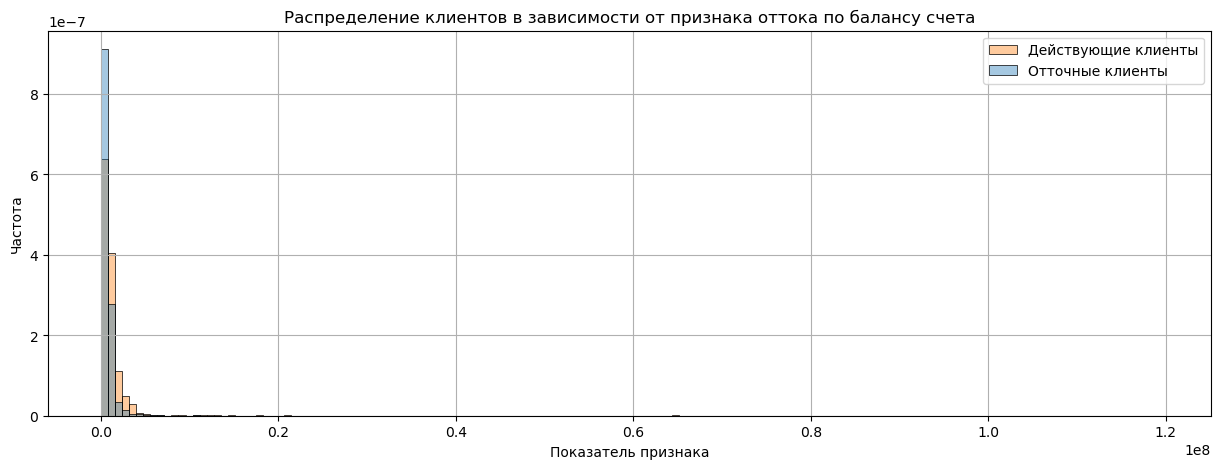

In [74]:
attribute_c('balance', 'балансу счета',150)

В связи с большим разбросом данных по значению баланса, необходимо выбрать средний интервал для читаемости графика:

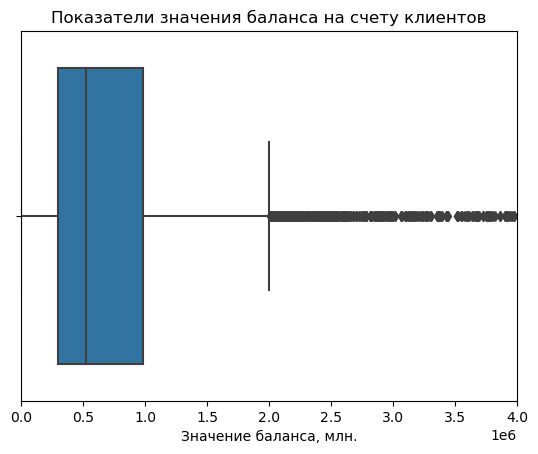

In [75]:
# возьмем условную границу до 4 млн.
sns.boxplot(x = banks['balance']).set(title='Показатели значения баланса на счету клиентов')
plt.xlabel('Значение баланса, млн.')
plt.xlim(0,4000000)
plt.show()

По данным видно, что максимальная граница, за которой уже идут выбивающиеся значения - 2 млн. Для оценки отточности клиентов возьмем эту условную границу.

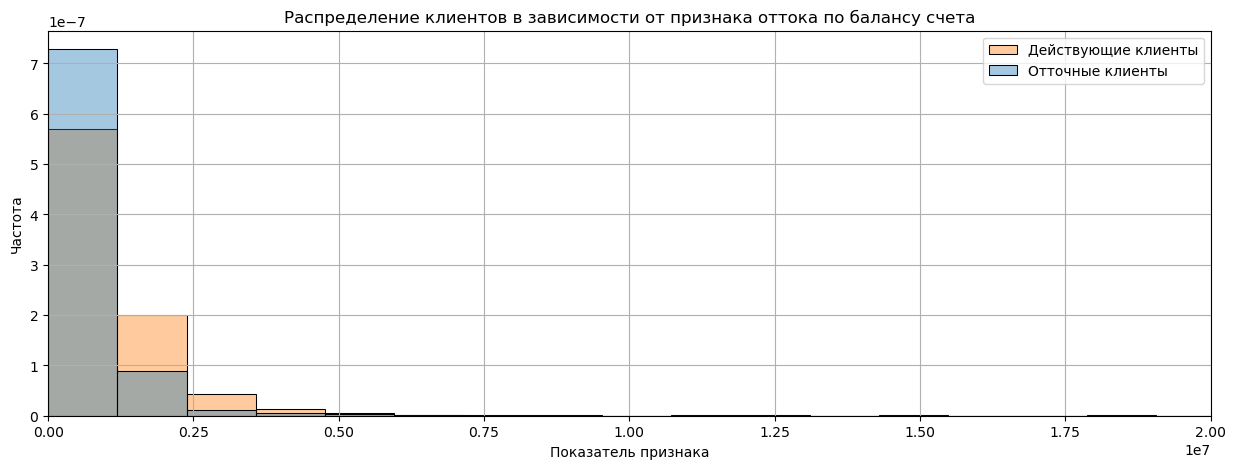

In [76]:
plt.figure(figsize=(15,5))
sns.histplot(data=banks,
             hue='churn',
             x='balance', 
             stat="density", 
             common_norm=False, 
             bins=100, 
             alpha=0.4)
plt.title(f'Распределение клиентов в зависимости от признака оттока по балансу счета')
plt.legend(labels=['Действующие клиенты', 'Отточные клиенты'])
plt.xlabel('Показатель признака')
plt.ylabel('Частота')
plt.xlim(0,20000000)
plt.grid()
plt.show() 

**Большинство клиентов хранит не более 120 000 на счету, также данная категория клиентов имеет высокий показатель оттока. Присутствуют и клиенты с весьма высоким значением, но так как эти клиенты скорее исключения, в общем анализе мы их рассматривать не будем."**

### Распределение клиентов по доходу

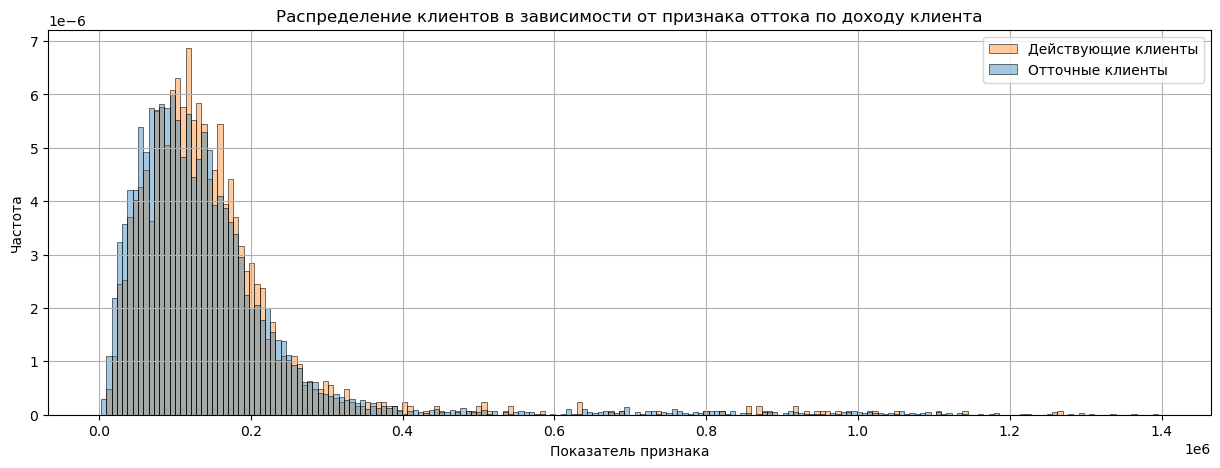

In [77]:
attribute_c('est_salary', 'доходу клиента',200)

С доходом клиентов похожая ситуация, что и с балансом, значения крайне разбросаны, также выделим интервал для читаемости графика:

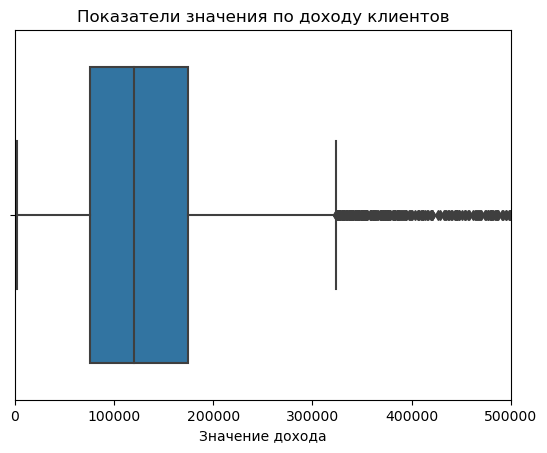

In [78]:
# возьмем условную границу до 500 тыс..
sns.boxplot(x = banks['est_salary']).set(title='Показатели значения по доходу клиентов')
plt.xlabel('Значение дохода')
plt.xlim(0,500000)
plt.show()

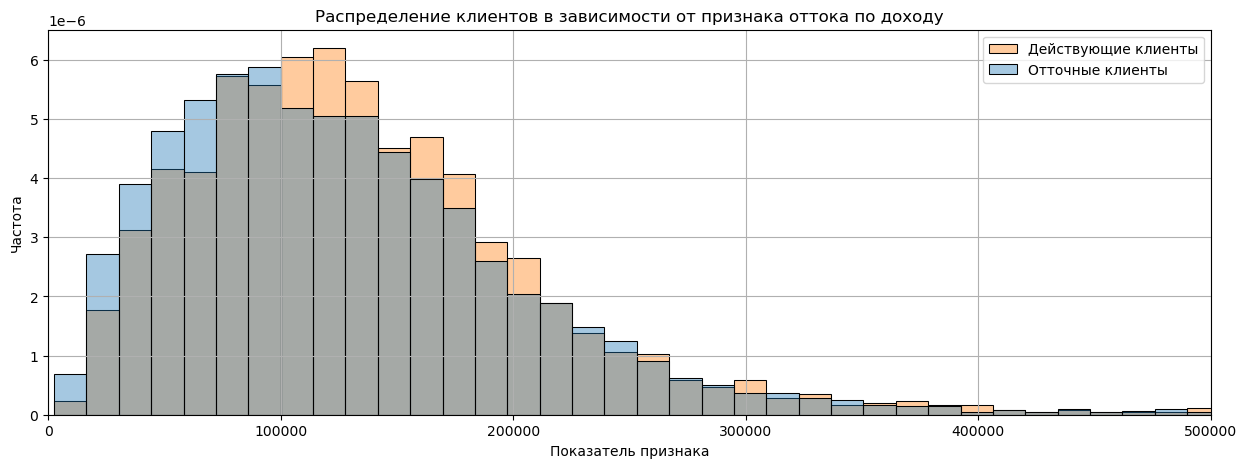

In [79]:
plt.figure(figsize=(15,5))
sns.histplot(data=banks,
             hue='churn',
             x='est_salary', 
             stat="density", 
             common_norm=False, 
             bins=100, 
             alpha=0.4)
plt.title(f'Распределение клиентов в зависимости от признака оттока по доходу')
plt.legend(labels=['Действующие клиенты', 'Отточные клиенты'])
plt.xlabel('Показатель признака')
plt.ylabel('Частота')
plt.xlim(0,500000)
plt.grid()
plt.show() 

**Доход большинства клиентов чаще всего не превышает 200 000, при том наиболее склонны к оттоку клиенты с доходом ниже 100 000.**

### Портрет клиента банка

**О типичном клиенте банка можно сказать следующее - это мужчина или женщина чаще из г. Ярославль в возрасте от 32 до 40, со скоринговым баллом от 840 до 920 и с нулевым баллом по оценке собственности. Является активным клиентом, пользуется кредитной картой и, как правило, еще каким-то продуктом банка. Доход такого клиента чаще всего не выше 200 000, а баланс на счете не более 120 000.**

### Матрица корреляции

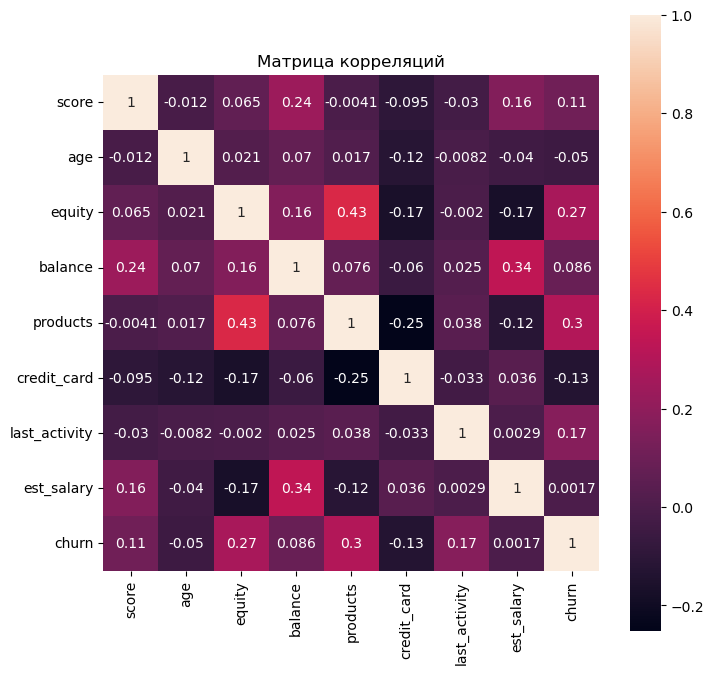

In [80]:
# посмотрим на матрицу корреляций в целом
cm = banks.drop('userid', axis=1)

plt.figure(figsize=(8,8))
sns.heatmap(cm.corr(numeric_only=True), annot=True, square=True)
plt.title('Матрица корреляций')
plt.show()

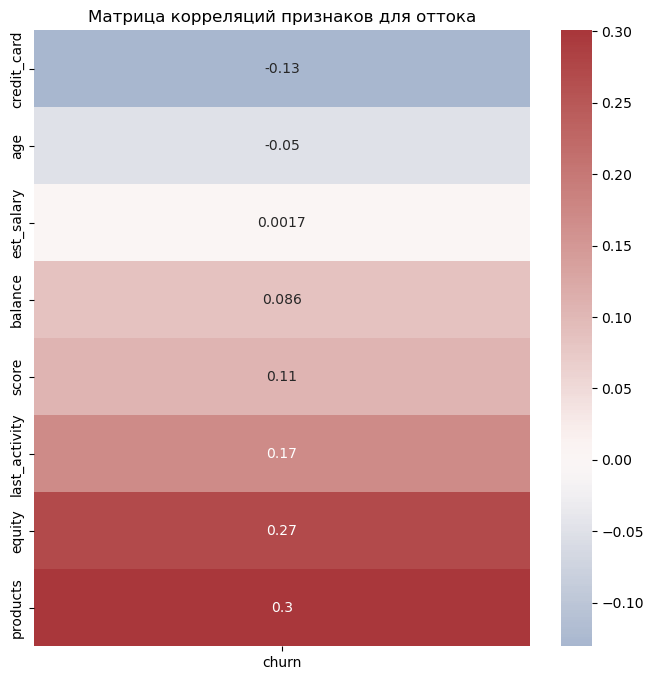

In [81]:
# построим матрицу корреляций для оттока
cm_churn = cm.corr(numeric_only=True)

plt.figure(figsize=(8,8))
sns.heatmap(cm_churn.loc[:,['churn']].drop('churn').sort_values('churn'), annot=True, cmap='vlag',center=0)
plt.title('Матрица корреляций признаков для оттока')
plt.show()

**Матрица корреляции демонстрирует крайне слабую зависимость признаков. Поэтому выявить опредленную закономерность влияния на отток не представлется возможным, в дальнейшем выделим сегменты и проверим влияние совокупности признаков на отток клиентов банка. Мультиколлинеарности признаков также не отмечено.**

**Выводы по исследовательскому анализу:**
- средний % оттока по банку составил 18,2
- клиенты из Ярославля составляют 59 %, из Рыбинска 27 % и меньше всего клиентов из Ростова. При этом % оттока по Ярославлю и Ростову - 19%, по Рыбинску - 16%.
- клиенты банка это мужчины и женщины в возрасте от 18 до 86, при этом средний показатель возраста 40-42. Мужчины в возрасте 35 -40 более склонны к уходу.
- клиенты банка охотно пользуются кредитной картой (68% всех клиентов). Высокий процент оттока наблюдается у клиентов, которые не пользуются кредитной картой - 25,6%.
- чаще всего клиенты банка имеют скоринговый балл не ниже 850 и нулевой балл собственности, при этом наибольший отток у клиентов с баллом 900 - 920, а самый высокий процент оттока (27,6%) у клиентов с баллом собстенности 4-5.
- большинство клиентов пользуются  2 продуктами банка с процентом оттока - 19%. Клиенты с 1 продуктом уходят крайне редко. И напротив, у клиентов с 4 продуктами крайне высокий процент оттока - 63%
- что касается дохода, в данных присутствуют клиенты как с крайне низким доходом, так и клиенты, которых можно по доходу отнести к VIP, но большинство клиентов получают не более 200 000, при этом наиболее склонны к оттоку клиенты с доходом ниже 100 000
- большинство клиентов хранит не более 120 000 на счету, также данная категория клиентов имеет высокий показатель оттока
- по матрице корреляции не отмечено влияния признаков на отток клиентов.

## Сегментация клиентов

При выделении категорий клиентов необходимо не забывать о том, что существует категория клиентов "неизбежный отток", при которой может быть потрачено много ресурсов на удержание, но эти клиенты все равно уйдут по независящим от компании причинам.  В связи с этим при выделении сегментов сделаем упор на тех клиентов, которые наиболее надежны для банка (количество продуктов, баланс на счетах, баллы собственности, активность).

Выделяя сегменты высокотточных клиентов необходимо соблюдать 2 условия:
* численность сегмента от 500 до 2000
* процент оттока сегмента выше 18,2% (средний % оттока по банку)

### Cегмент 1 - активные клиенты мужчины с баллом собственности больше 4

In [82]:
segment_1 = banks.query('gender == "М" and equity >= 4  and last_activity == 1')

# проверяем 2 условия выделения сегментов
print('Количество клиентов в сегменте:', segment_1.shape[0])
print('Процент оттока клиентов сегмента:', round(segment_1['churn'].mean()*100,1))

Количество клиентов в сегменте: 1052
Процент оттока клиентов сегмента: 49.3


**Сегмент активных клиентов мужчин с баллом собственности больше 4 показывает крайне высокий процент оттока - 49%. Возможно являясь активным клиентом пользователь не получает достаточного удовлетворения от сервиса обслуживания банка, в данном случае необходимо разработать меры (акции, спец.программы) по удержанию лояльных клиентов. Также как показывает анализ именно клиенты с баллом собственности выше 4 склонны к оттоку, возможно необходимо проявить гибкость к данным клиентам предложив, например, скидку при страховании имущества у компании-партнера.**

### Cегмент 2 - клиенты с доходом ниже 200 тыс. и балансом свыше 1 млн.

In [83]:
segment_2 = banks.query('est_salary <= 200000 and balance >= 1000000')

# проверяем 2 условия выделения сегментов
print('Количество клиентов в сегменте:', segment_2.shape[0])
print('Процент оттока клиентов сегмента:', round(segment_2['churn'].mean()*100,1))

Количество клиентов в сегменте: 1372
Процент оттока клиентов сегмента: 35.9


**Сегмент клиентов с доходом ниже 200 000 и балансом свыше 1 000 000 показывает достаточно высокий процент оттока - 36%. Можно предположить, что клиентов либо не устраивает низкий процент по предлагаемым вкладам, либо клиенты не получали предложения по вкладам вовсе. Необходимо сделать упор в данном сегменте клиентов на предложения по вкладам.**


### Cегмент 3 - клиенты c балансом свыше 1 млн. и количеством продуктов банка больше 2

In [84]:
segment_3 = banks.query('balance >= 1000000 and products >= 2')

# проверяем 2 условия выделения сегментов
print('Количество клиентов в сегменте:', segment_3.shape[0])
print('Процент оттока клиентов сегмента:', round(segment_3['churn'].mean()*100,1))

Количество клиентов в сегменте: 1676
Процент оттока клиентов сегмента: 41.0


**Также высокий процент оттока - 41% прослеживается в сегменте, где на счетах клиентов хранится свыше 1 000 000, но при этом он охотно пользуется продуктами банка (свыше 2 продуктов). С данным сегментом также необходимо проработать вклады (ставки, спец.предложения и т.д.), также стоить проверить насколько конкуретноспособна плата за обслуживание. Возможно стоит проверить насколько полоценную обратную связь получает клиент при обращении в банк, насколько удобно клиенту использовать мобильное приложение, так как пользование продуктами банка подразумевает под собой постоянную клиентскую поддержку при возникновении проблем(заблокировалась карта, забыл пинкод, возможность отсрочки платежа и т.д.)**

## Проверка гипотез

### Гипотеза о различии дохода ушедших и действующих клиентов

**Нулевая гипотеза (H0)**: Средний доход отточных и действующих клиентов одинаков.

**Альтернативная гипотеза(H1)**: Средний доход отточных и действующих клиентов различен.

Установим пороговое значение статистической значимости = 0,05.

In [85]:
# задаем статистическую значимость и проверяем гипотезу
alpha = 0.05

banks_churn = banks[banks['churn'] == 1]['est_salary']
banks_stay = banks[banks['churn'] == 0]['est_salary']

results = st.ttest_ind(banks_churn, banks_stay)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.8647861589211189
Не получилось отвергнуть нулевую гипотезу


In [86]:
# проверим, взяв среднее значение каждой группы клиентов
print('Средний доход отточных клиентов:', round(banks[banks['churn'] == 1]['est_salary'].mean()))
print('Средний доход действующих клиентов:', round(banks[banks['churn'] == 0]['est_salary'].mean()))

Средний доход отточных клиентов: 148290
Средний доход действующих клиентов: 147675


**На имеющихся данных, на уровне значимости 5%, нет оснований отвергнуть нулевую гипотезу о равенстве среднего дохода ушедших и действующих клиентов.**

### Гипотеза о различии скорингового балла ушедших и действующих клиентов

**Нулевая гипотеза (H0)**: Средний скоринговый балл отточных и действующих клиентов одинаков.

**Альтернативная гипотеза(H1)**: Средний скоринговый балл отточных и действующих клиентов различен.

Установим пороговое значение статистической значимости = 0,05.

In [87]:
# задаем статистическую значимость и проверяем гипотезу
alpha = 0.05

banks_churn_1 = banks[banks['churn'] == 1]['score']
banks_stay_1 = banks[banks['churn'] == 0]['score']

results = st.ttest_ind(banks_churn_1, banks_stay_1)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.643464081116001e-26
Отвергаем нулевую гипотезу


In [88]:
# проверим, взяв среднее значение каждой группы клиентов
print('Средний скоринговый балл отточных клиентов:', round(banks[banks['churn'] == 1]['score'].mean()))
print('Средний скоринговый балл действующих клиентов:', round(banks[banks['churn'] == 0]['score'].mean()))

Средний скоринговый балл отточных клиентов: 863
Средний скоринговый балл действующих клиентов: 845


**На имеющихся данных, на уровне значимости 5%, есть основания отвергнуть нулевую гипотезу о равенстве среднего скорингового балла ушедших и действующих клиентов.**

## Выводы

**В ходе изучения и предварительной обработки** предоставленных данных клиентов банка:
* названия столбцов были приведены к единому стилю
* данные были проверены на дубликаты и пропуски (были удалены строки без указания возраста)
* столбцы с возрастом и скоринговым баллом были приведены к корректному типу

**В ходе исследовательского анализа можно выделить основные моменты:**

- средний % оттока по банку составил 18,2
- больше половины клиентов банка это жители Ярославля, отток по городу составляет 19 %. 
- типичный клиент банка это мужчина или женщина в возрасте 40-42. Однако, к оттоку склонны больше мужчины 35-40 лет.
- высокий процент оттока наблюдается у клиентов, которые не пользуются кредитной картой - 25,6%. 
- наибольший отток у клиентов со скоринговым баллом 900 - 920.
- высокий процент оттока (27,6%) у клиентов с баллом собственности 4-5
- большинство клиентов пользуются  2 продуктами банка с процентом оттока - 19%. У клиентов с 4 продуктами высокий процент оттока - 63%
- большинство клиентов получают не более 200 000, при этом наиболее склонны к оттоку клиенты с доходом ниже 100 000
- большинство клиентов хранит не более 120 000 на счету, также данная категория клиентов имеет высокий показатель оттока
- по матрице корреляции не отмечено влияния признаков на отток клиентов.

**В целом можно сказать об уходящих клиентах следующее - чаще это активные клиенты мужчины из Ярославля 38-40 лет с кредитной картой, со скоринговым баллом 860-870, с баллом собственности не ниже 4, средним доходом до 150 000, балансом свыше 1 000 000, которые пользуются 2-3 продуктами банка.**

**При анализе сегментов были выявлены следующие особенности:**
- наибольшему оттоку подвержены мужчины с оценочным баллом собственности выше 4, также они являются активными клиентами банка - 49% оттока по сегменту
- высокий процент показал и сегмент клиентов, которые на балансе хранят деньги свыше 1 млн. и используют не менее 2-х продуктов банка - 41%
- достаточно высок процент и у сегмента клиентов, доход которых не выше 200 000, но на балансе хранятся деньги свыше 1 млн.- 37%


**На основе изученных данных можно дать следующие рекомендации:**
- необходимо проработать вопрос об удовлетворенности клиентов в обслуживании(проверка регулярности общения с клиентами, есть ли проблемы с техподдержкой, сложность использования мобильного приложения, анализ отзывов клиентов)
- рассмотреть возможность запуска кампании по рассылке новостей — простая тактика, которая помогает развивать доверительные отношения с клиентами, поощрять предпочтение бренда и вдохновлять лояльность(контент не обязательно должен быть рекламным) и время от времени рассылать опросы об удовлетворенности клиентов в целом
- для активных клиентов необходимо проводить периодические акции, тем самым поощряя их за выбор банка(например предлагать кредитную карту с более высоким сроком)
- необходимо сделать акцент на вклады, проверить конкурентноспособность предлагаемых условий
- проявить гибкость к клиентам с баллом собственности от 4 и выше, предложив, например, скидку при страховании имущества у компании-партнера